In [1]:
%matplotlib inline
import sys
sys.path.append('C:/Users/wesle/Dropbox/Hacks')
import PltHacks as PH
sys.path.append('C:/FishIsland_2017/')
import Cospectra_Reader as CR
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
Path = 'C:/FishIsland_2017/FluxData_QuckLook.csv'
df = pd.read_csv(Path,delimiter = ',',header = 0)
df = df.set_index(pd.DatetimeIndex(df.datetime))
df = df.drop(df.columns[0],axis=1)
Data = df.astype(float)
Wind_Groups = Data.groupby(Data['Dir']).count()
PPFD_Groups = Data.groupby(Data['Photon_Flux']).mean()
Daily = Data.groupby(Data.index.dayofyear).mean()
Daily_Max = Data.groupby(Data.index.dayofyear).max()
Daily_Min = Data.groupby(Data.index.dayofyear).min()
Daily = Daily[1:-1]        ## Dropping the first and last day of the record as they are incomplete
Daily_Max = Daily_Max[1:-1] 
Daily_Min = Daily_Min[1:-1] 
Hourly = Data.groupby(Data.index.hour).mean()



# Here is summary of what we've seen so far at Fish Island:

### East has been the predominate wind direction so far.

* The CSAT is pointed 35 deg NE so this is good news, the winds have been much more coperative than last year!    

* If we filter out all winds +-/ 30 degrees of 215 that only amounts to 4.8% of the dataset.  If we wanted to be more conservative and do +- 60 that would still only be 11.4%

* The winds get more varriable and the weather gets worse in August and September, so I expect this disribution will change some

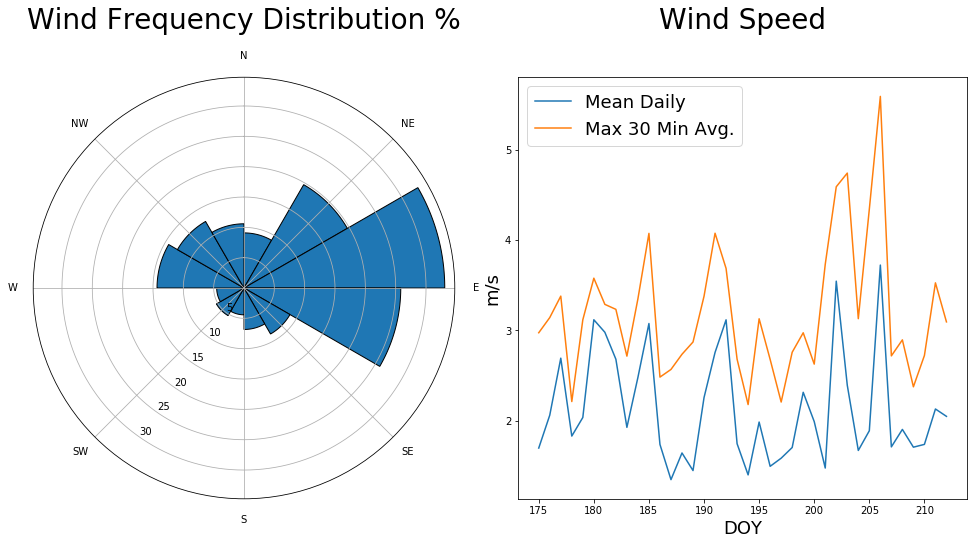

In [2]:
fig = plt.figure(figsize = (14,7))
ax1 = fig.add_subplot(1,2,1,projection = 'polar')
PH.Compas(ax1)
ax1.bar(pd.to_numeric(Wind_Groups.index)*np.pi/180,
         Wind_Groups['wind_dir']/Wind_Groups['wind_dir'].count(),width = 30*np.pi/180, edgecolor = 'black')
ax1.set_title('Wind Frequency Distribution %',fontsize = 28,y = 1.1)
ax1.set_rlabel_position(215)
plt.tight_layout()
ax2 = fig.add_subplot(1,2,2)
ax2.plot(Daily['wind_speed'],label = 'Mean Daily')
ax2.plot(Daily_Max['wind_speed'],label = 'Max 30 Min Avg.')
ax2.set_title('Wind Speed',fontsize = 28,y = 1.1)
ax2.set_ylabel('m/s',fontsize = 18)
ax2.set_xlabel('DOY',fontsize = 18)
ax2.legend(fontsize = 18)
plt.show()

### Temperatues have been highly varriable, but aren't displaying any trend yet.  R$_n$ and PPFD also varried considerably, and the signal from decreasing sun angle and day length is just beinning to become apparent towards the end of the series.

* Sun angle is staring to decrease rapdly, and the first "sunset" was on DOY 206.  Its just now dark for about 4 hours at night.  The next data pull (scheduled Aug 21) should really highlight this decrease

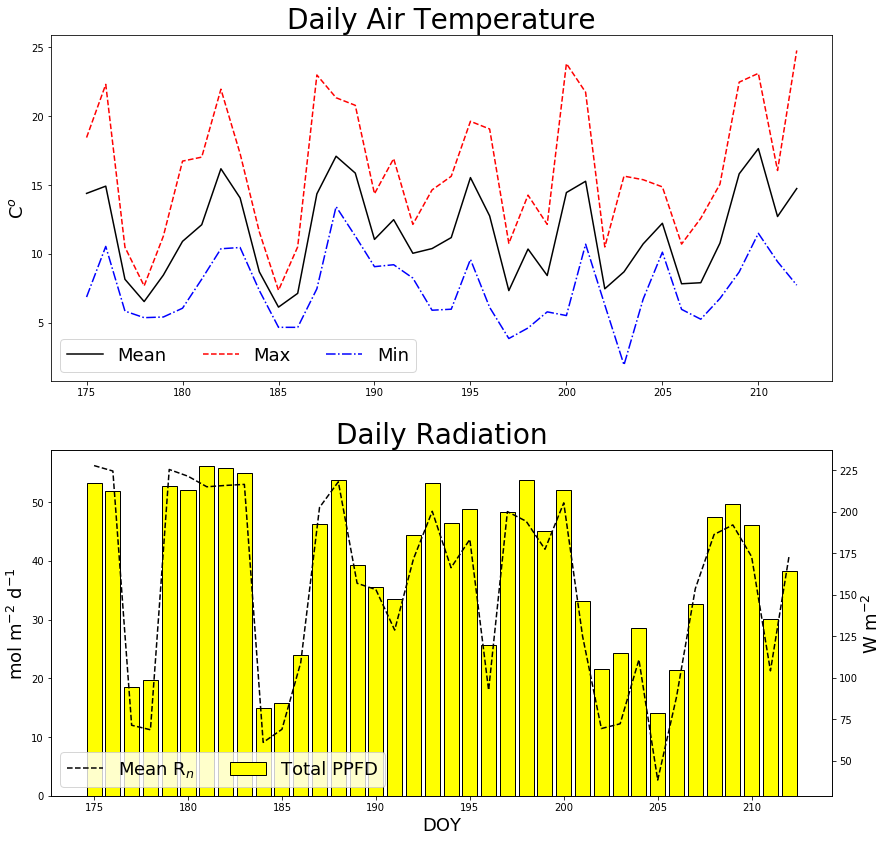

In [3]:
fig,axes = plt.subplots(nrows = 2,ncols = 1,figsize = (14,14))
axes[0].plot(Daily['AirTC_Avg'],color = 'black',label ='Mean')
axes[0].plot(Daily_Max['AirTC_Avg'],color = 'red',linestyle = '--',label ='Max')
axes[0].plot(Daily_Min['AirTC_Avg'],color = 'blue',linestyle = '-.',label ='Min')
axes[0].set_title('Daily Air Temperature',fontsize = 28)
axes[0].set_ylabel('C$^o$',fontsize = 18)
axes[0].legend(fontsize = 18,loc = 3,ncol=3)

axes[1].bar(Daily.index,Daily['PPFD_Avg']*3600*24/1000000,color = 'yellow'
            ,edgecolor = 'black',label = 'Total PPFD')
twin = axes[1].twinx()
twin.plot(Daily['NR_Wm2_Avg'],color = 'black',linestyle = '--',label = 'Mean R$_n$')
axes[1].plot(np.nan,color = 'black',linestyle = '--',label = 'Mean R$_n$')  ## Hack trick system into using same legend
axes[1].set_title('Daily Radiation',fontsize = 28)
axes[1].legend(fontsize = 18,loc = 3,ncol=2)
axes[1].set_ylabel('mol m$^{-2}$ d$^{-1}$',fontsize = 18)
twin.set_ylabel('W m$^{-2}$',fontsize = 18)
axes[1].set_xlabel('DOY',fontsize = 18)

plt.show()

### Terain at the site is characterized by low center polygons.

* I haven't finished georefrencing all the drone images or fully analyzed them, but as a rough estimate, about 20% of the ground surface consists of slightly raisesd (10-15 cm) ridges that are drier with shrubier vegetation and the other 80% low, wet polygon centers with much higher organic matter content.


* When we initally arrived the active layer was very shallow so we decided to install soil probs at 2.5, 5, and 15 cm.  I had thought about adjusting them once the active layer depth increase, but elected to leave them in place instead for the sake of continuity.
    * Having readings at 2.5 and 5 cm allows for an estimation of soil heat storage.
    * The ridges are consistenly warmer in the top layer of the soil, probably becaue they are drier and farther from the water table.


* The active layer is shallower under the polygon rims than centers, which coupled with the fact that the rims are raised means that each center is essentially a small bowl shaped basin.  Canopy heights on the rims are considerably higher, tho vegetation is very low here all in all.
    * AL & Veg measurements are the average of 10 samples taken at roughly the same spot on each field visit.


* The water table responds quite quicly to precipitation.  I suspect there is minimal outflow as the rims prevent much lateral movement in ground water. Since the base of the active layer prevents infiltration each polygon probably acts like a mini endoheric basin.

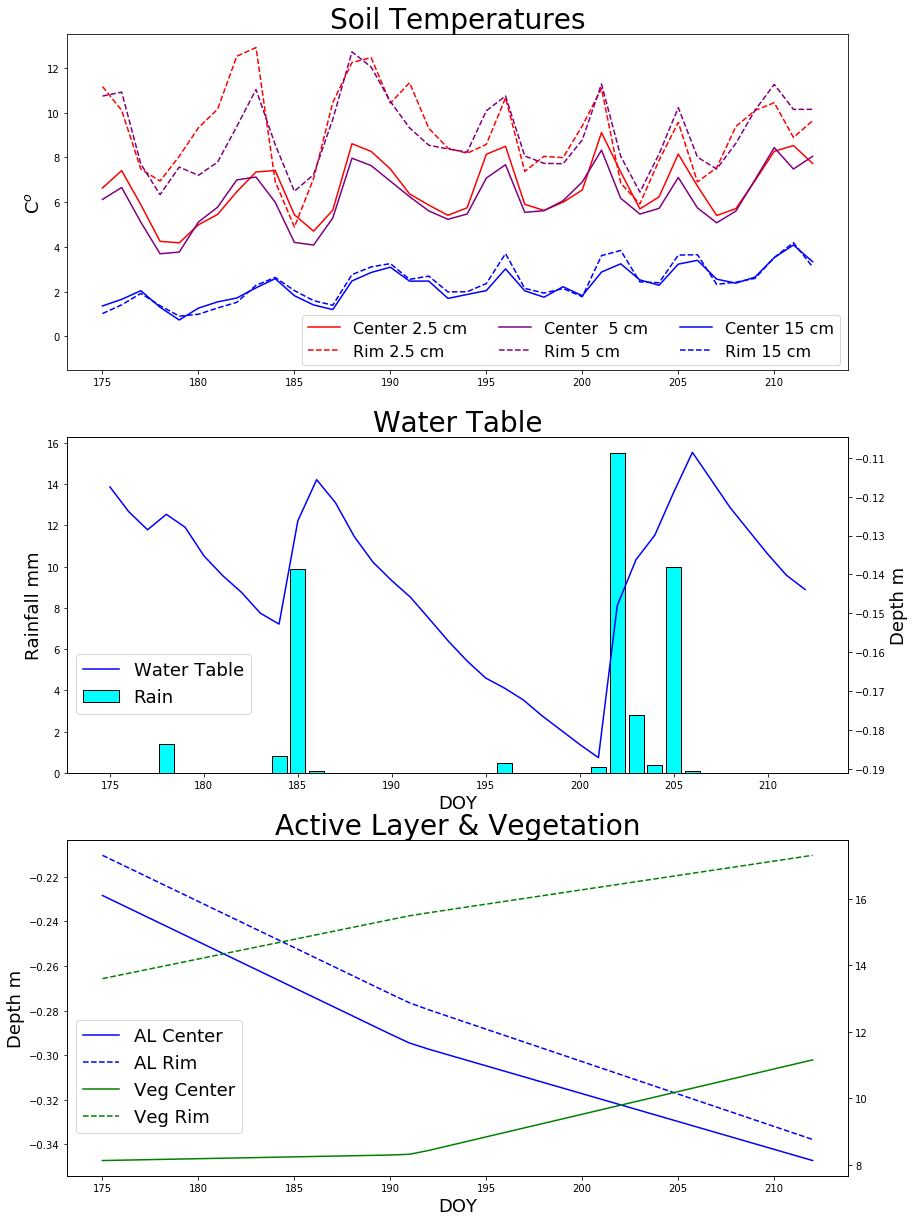

In [4]:
fig,axes = plt.subplots(nrows = 3,ncols = 1,figsize = (14,21))
axes[0].plot(Daily['Temp_2_5_1'],color = 'r',label = 'Center 2.5 cm')
axes[0].plot(Daily['Temp_2_5_2'],color = 'r',linestyle = '--',label = 'Rim 2.5 cm')
axes[0].plot(Daily['Temp_5_1'],color='purple',label = 'Center  5 cm')
axes[0].plot(Daily['Temp_5_2'],color='purple',linestyle = '--',label = 'Rim 5 cm')
axes[0].plot(Daily['Temp_15_1'],color = 'blue',label = 'Center 15 cm')
axes[0].plot(Daily['Temp_15_2'],color = 'blue',linestyle = '--',label = 'Rim 15 cm')
axes[0].legend(ncol = 3,fontsize = 16,loc = 4,bbox_to_anchor=(1, -.01))
axes[0].set_ylim(-1.5,13.5)
axes[0].set_title('Soil Temperatures',fontsize = 28)
axes[0].set_ylabel('C$^o$',fontsize = 18)

axes[1].bar(Daily.index,Daily['Rain_mm_Tot']*48,color = 'cyan',edgecolor='black',label = 'Rain')
twin = axes[1].twinx()
twin.plot(Daily['Tabel_1'],color = 'blue',label = 'Water Table')
axes[1].plot(np.nan,color = 'blue',label = 'Water Table')
axes[1].set_title('Water Table',fontsize = 28)
twin.set_ylabel('Depth m',fontsize = 18)
axes[1].set_ylabel('Rainfall mm',fontsize = 18)
axes[1].set_xlabel('DOY',fontsize = 18)
axes[1].legend(loc = 3,fontsize = 18,bbox_to_anchor=(0, .15))

axes[2].plot(Daily['Active_Layer_1']*-1,label = 'AL Center',color = 'blue')
axes[2].plot(Daily['Active_Layer_2']*-1,label = 'AL Rim',color = 'blue',linestyle = '--')
twin= axes[2].twinx()
twin.plot(Daily['Canopy_Height_1'],label = 'Center',color='green')
twin.plot(Daily['Canopy_Height_2'],label = 'Rim',color='green',linestyle = '--')
axes[2].plot(np.nan,label = 'Veg Center',color='green')
axes[2].plot(np.nan,label = 'Veg Rim',color='green',linestyle = '--')
axes[2].legend(fontsize = 18,loc = 3, bbox_to_anchor=(0, .1))
axes[2].set_ylabel('Depth m',fontsize = 18)
axes[2].set_title('Active Layer & Vegetation',fontsize = 28)
axes[2].set_xlabel('DOY',fontsize = 18)

plt.show()

# Now on to the flux data:

* As I've previously mentioned - the smartflux system was only collecting 1Hz data for the first few weeks and was also just loggin the raw voltage data from the anemometer rather than acounting for the multipliers.
    * The frequency was reset to 10 Hz  on July 12th and it has been working fine since.
    * The multiplier issues is an easy fix, I just wrote a script to go thought all the .ghg files, correct the values, and re-zip them.


* I've played around with processing the data a couple different ways.
    * First I ran the default settings suggested by eddy pro which uses covariance maximization to determine the time lags.  
    * Then I ran it agian using the automatic time lag optimization function and the *Fratin et al. 2012* low pass filtering correction as the the manual suggests this method is more suited for use on enclosed path systems like the 7200.
    
### Post processing, I filtered the fluxes by:

* Dropping fluxes where u* <0.1


* Filtering out intense precip &lt; 1 mm/half hour
    * excpet for CH$_4$ where I dropped all precip observations since its a vertically mounted open path system
    
    
* Filtered out winds $\pm$ 30 $^o$ of the back of the sonic (215$^o$)


* Filtered out values with a QC socre of 2 accoring to *Mauder and Foken 2004*


* Ran a Mean Absolute Difference (MAD) spike removal algorithm described in *Papale et al. 2006.*


### I then gapfilled the dataset using Artificial Neural Networks.

* It&#39;s provided a reasonable fit, but I havne&#39;t yet taken the time to fully optimeze it.  I show more aobut this farther down.

## Energy Ballance is better when when fluxes are calculated using the automatic time lag optimisation

* I think there is still some signal attenuation (especially for H$_2$O) that isn&#39;t acounted for.  I don&#39;t think the equations eddy pro uses to calculate the time lag (which are only based on tube length and diatemeter) do a good job acounting for the filter.
    * On a side note ... testing this in the lab could make for a pretty fun/interesting experiment.

*LE seems quite low relative to H and relative to LE we observed at Illisarvik Last year.


* For the 10Hz data, using the autmoatic time lag optimisation:

    * EBR = $\frac{\sum(H + LE)}{\sum(R_n-G)}$ = 80%
 
 
*  Using the covarinace maximisation:

    * EBR = $\frac{\sum(H + LE)}{\sum(R_n-G)}$ = 75%
 
 
* For the 1Hz data, it is 64% and 63% respectively.


* For the ground heat fulx, the plates are definitely underestimating ground heat fluxes.  Its difficult to get good contact with the peat due to the low bulk density and high pore space without conpressing/disturbing the substrate
    * I&#39;ve elected to use a gradient method detailed in *Liebethal et al. 2005* to calculate them intead.  
    * Even assuming a modest thermal capacity of ~ 0.4 W m$^2$ (which seems like a reasonable value for permafrost peatlands based of the sources I&#39;ve seen) the heat flux plates underestimate ground heat flux by about 40%.
        * I&#39;ve found a study that gives thermal conductivites for various peats depending on VWC 
    * Once I get around to calculating the bulk density from the soil samples i&#39;ve taken we&#39;ll be able to get a better handle on this.

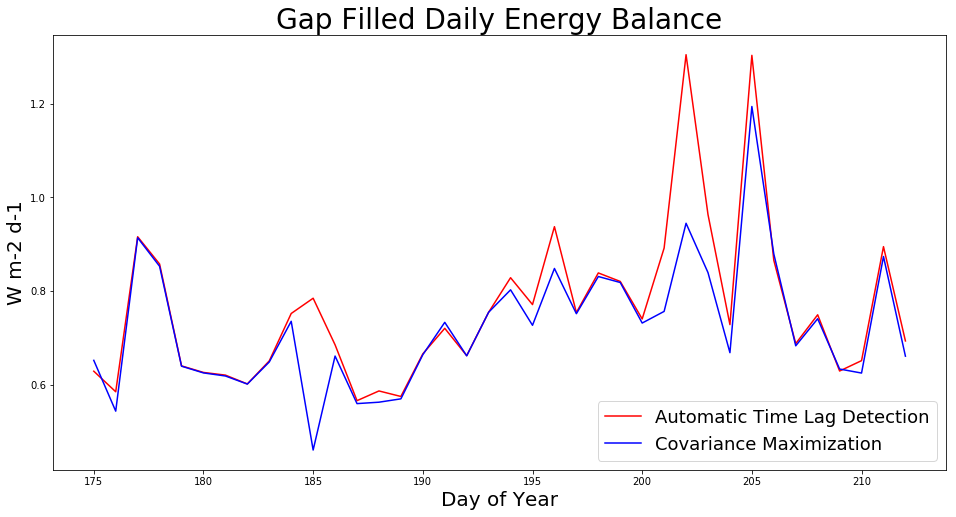

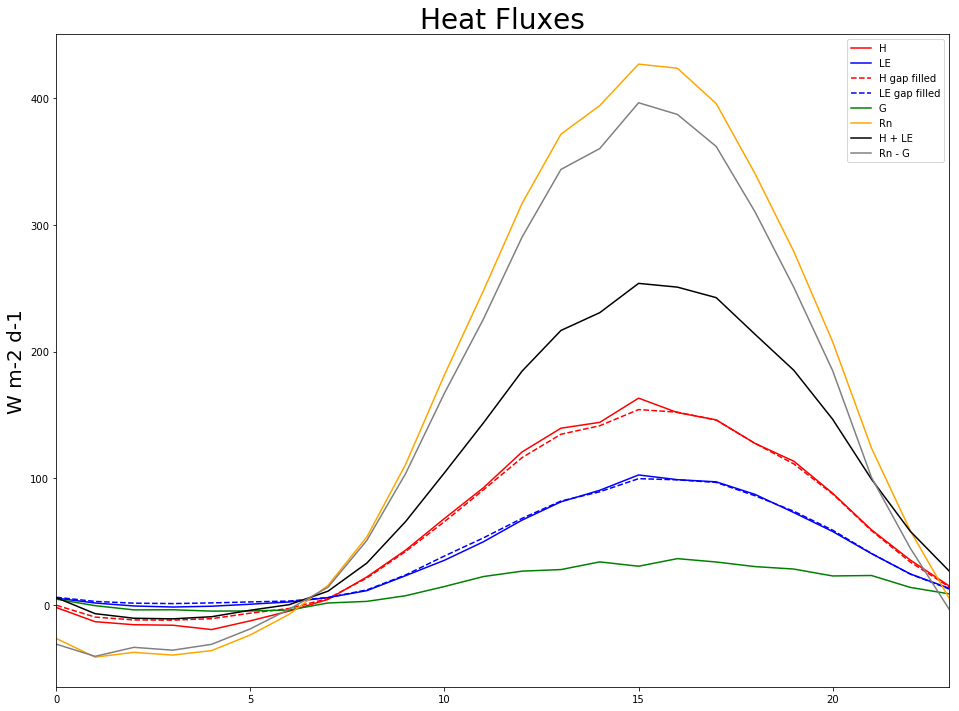

In [5]:
plt.figure(figsize = (16,8))
plt.plot((Daily['H_filled_ANN']+Daily['LE_filled_ANN'])/(Daily['NR_Wm2_Avg']-Daily['HFX']),
         label = 'Automatic Time Lag Detection',color = 'red')
plt.plot((Daily['H_Cov_filled_ANN']+Daily['LE_Cov_filled_ANN'])/(Daily['NR_Wm2_Avg']-Daily['HFX']),
         label = 'Covariance Maximization',color = 'blue')
plt.xlabel('Day of Year',fontsize = 20)
plt.ylabel('W m-2 d-1',fontsize = 20)
plt.title('Gap Filled Daily Energy Balance', fontsize = 28)
plt.legend(loc = 4,fontsize = 18)
plt.show()

plt.figure(figsize = (16,12))
plt.plot(Hourly['H'],color='red')
plt.plot(Hourly['LE'],color = 'blue')
plt.plot(Hourly['H_filled_ANN'],color='red',linestyle = '--',label = 'H gap filled')
plt.plot(Hourly['LE_filled_ANN'],color = 'blue',linestyle = '--',label = 'LE gap filled')
plt.plot(Hourly['HFX'],color = 'green',label = 'G')
plt.plot(Hourly['NR_Wm2_Avg'],color = 'orange',label = 'Rn')

plt.plot(Hourly['H_filled_ANN']+Hourly['LE_filled_ANN'],color = 'black', label = 'H + LE')
plt.plot(Hourly['NR_Wm2_Avg']-Hourly['HFX'],color = 'grey', label = 'Rn - G')

plt.ylabel('W m-2 d-1',fontsize = 20)
plt.xlim(0,23)
plt.title('Heat Fluxes', fontsize = 28)
plt.legend()
plt.show()

## Here is a quick look at the spectral analysis outputs from Eddypro for 10Hz Data processed using the Automatic Time lag optimisation function

* You can see there is some significant frequency attenuation going on, especially for the higher RH classes

* The correction calculations works best with longer data sets, so hopefully once we get some more data, we can better estimate the correction for LE

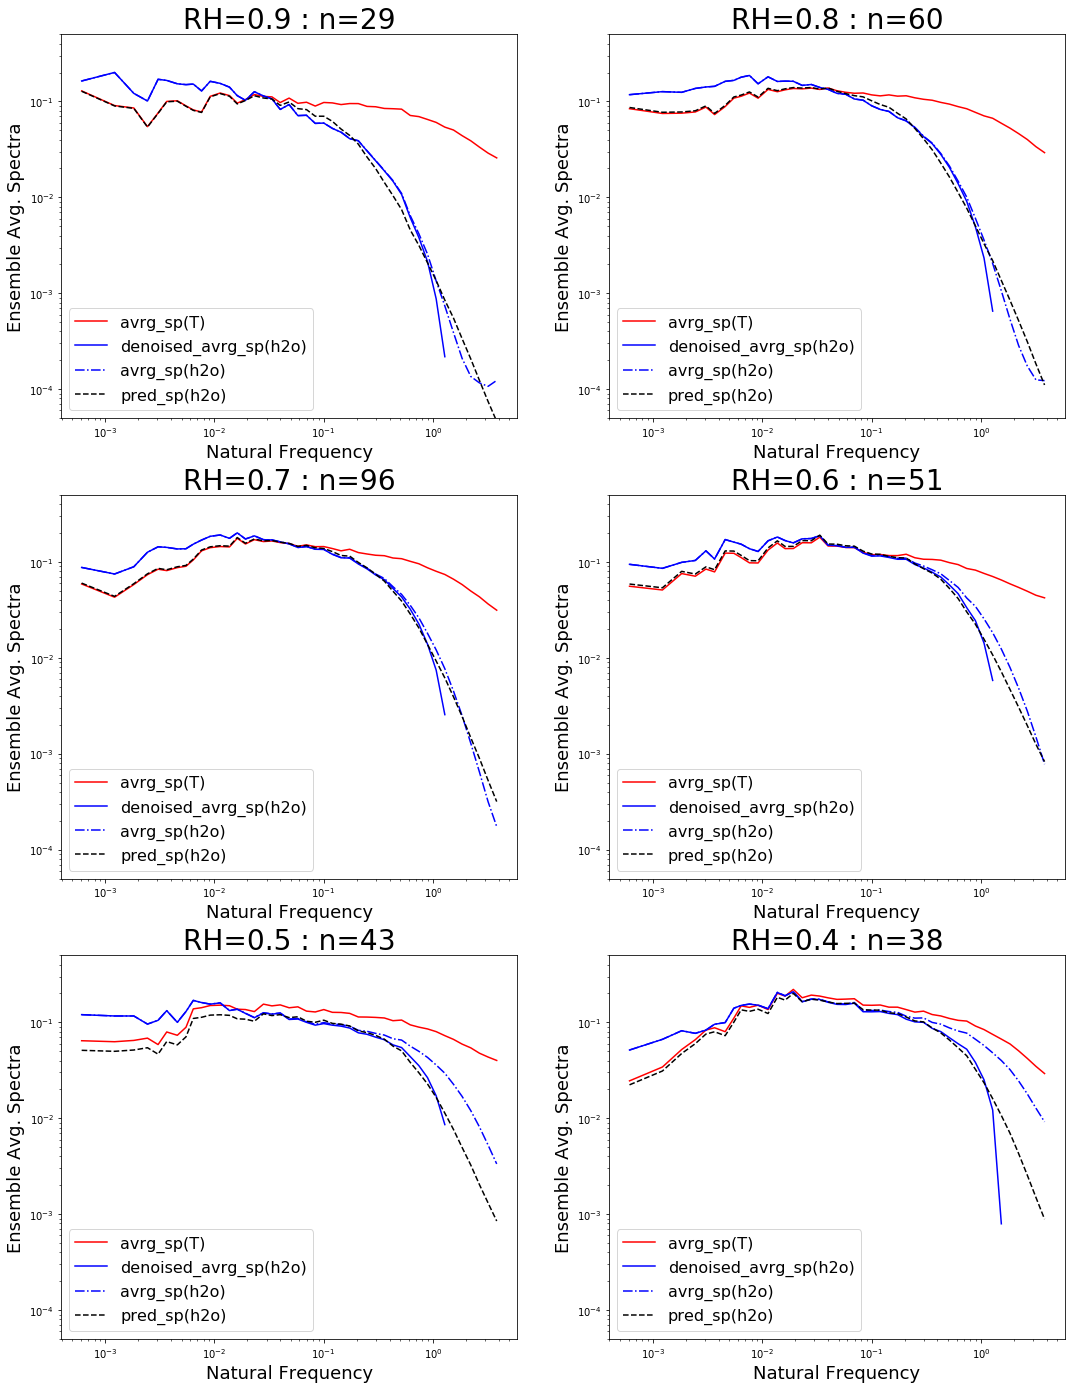

In [6]:
h2o_cosp_Auto = 'C:/FishIsland_2017/FluxResults/AutoLag/10Hz/eddypro_spectral_analysis/eddypro_Test_h2o_ensemble_spectra_2017-08-12T225727_adv.csv'
passive_cosp_Auto = 'C:/FishIsland_2017/FluxResults/AutoLag/10Hz/eddypro_spectral_analysis/eddypro_Test_passive_gases_ensemble_spectra_2017-08-12T225727_adv.csv'

def Cosp_Plot(ax,spectra,title,Colors = None):
    if Colors == None:
        Colors = ['red','blue']
    ax.set_xscale('log', nonposx='mask')
    ax.set_yscale('log', nonposy='mask')
    ax.plot(spectra[0],color = Colors[0])
    ax.plot(spectra[1],color = Colors[1])
    ax.plot(spectra[2],color = Colors[1],linestyle = '-.')
    ax.plot(spectra[3],color = 'black',linestyle = '--')
    ax.legend(fontsize = 16)
    ax.set_title(title,fontsize = 28)
    ax.set_ylim(5e-5,5e-1)
    ax.set_ylabel('Ensemble Avg. Spectra',fontsize = 18)
    ax.set_xlabel('Natural Frequency',fontsize = 18)
    
cosp = CR.Spectral_Read(h2o_cosp_Auto,passive_cosp_Auto)
fig,axes = plt.subplots(nrows = 3,ncols = 2,figsize = (18,24))
Cosp_Plot(ax = axes[0,0],spectra = [cosp.h2o['RH=0.9']['avrg_sp(T)'],cosp.h2o['RH=0.9']['denoised_avrg_sp(h2o)'],
                                   cosp.h2o['RH=0.9']['avrg_sp(h2o)'],cosp.h2o['RH=0.9']['pred_sp(h2o)']],
                                      title='RH=0.9 : n=29')
Cosp_Plot(ax = axes[0,1],spectra = [cosp.h2o['RH=0.8']['avrg_sp(T)'],cosp.h2o['RH=0.8']['denoised_avrg_sp(h2o)'],
                                   cosp.h2o['RH=0.8']['avrg_sp(h2o)'],cosp.h2o['RH=0.8']['pred_sp(h2o)']],
                                      title='RH=0.8 : n=60')
Cosp_Plot(ax = axes[1,0],spectra = [cosp.h2o['RH=0.7']['avrg_sp(T)'],cosp.h2o['RH=0.7']['denoised_avrg_sp(h2o)'],
                                   cosp.h2o['RH=0.7']['avrg_sp(h2o)'],cosp.h2o['RH=0.7']['pred_sp(h2o)']],
                                      title='RH=0.7 : n=96')
Cosp_Plot(ax = axes[1,1],spectra = [cosp.h2o['RH=0.6']['avrg_sp(T)'],cosp.h2o['RH=0.6']['denoised_avrg_sp(h2o)'],
                                   cosp.h2o['RH=0.6']['avrg_sp(h2o)'],cosp.h2o['RH=0.6']['pred_sp(h2o)']],
                                      title='RH=0.6 : n=51')
Cosp_Plot(ax = axes[2,0],spectra = [cosp.h2o['RH=0.5']['avrg_sp(T)'],cosp.h2o['RH=0.5']['denoised_avrg_sp(h2o)'],
                                   cosp.h2o['RH=0.5']['avrg_sp(h2o)'],cosp.h2o['RH=0.5']['pred_sp(h2o)']],
                                      title='RH=0.5 : n=43')
Cosp_Plot(ax = axes[2,1],spectra = [cosp.h2o['RH=0.4']['avrg_sp(T)'],cosp.h2o['RH=0.4']['denoised_avrg_sp(h2o)'],
                                   cosp.h2o['RH=0.4']['avrg_sp(h2o)'],cosp.h2o['RH=0.4']['pred_sp(h2o)']],
                                      title='RH=0.4 : n=38')


## CO$_2$ seems to be pretty well behaved, but I don't really know what's going on with CH$_4$ here

* I'm still working through Fratin et al. 2012 and Ibrom at al. 2007 so I can get a better understanind of what exactly is going on here.

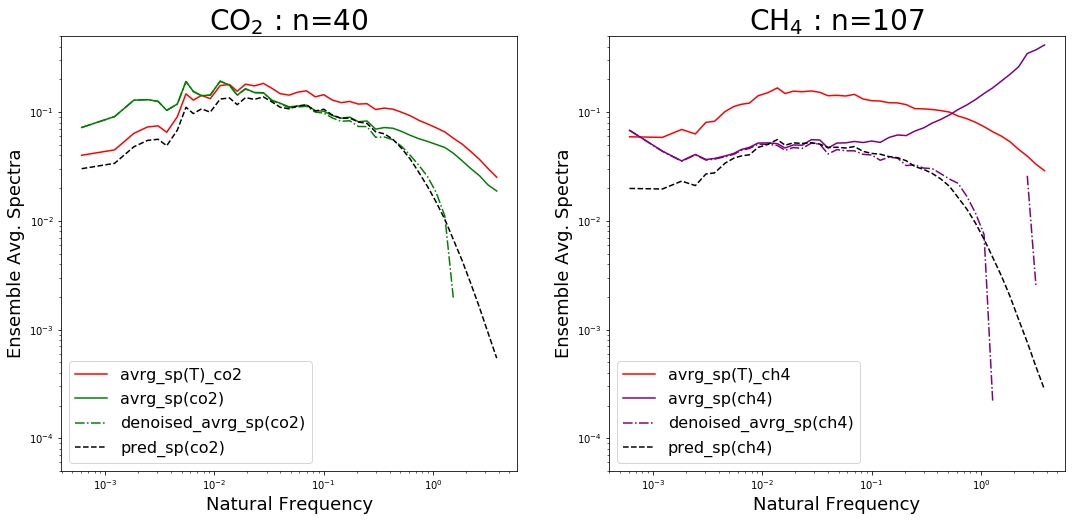

In [7]:
fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (18,8))
Cosp_Plot(ax = axes[0],spectra = [cosp.Passive['avrg_sp(T)_co2'],cosp.Passive['avrg_sp(co2)'],
                                   cosp.Passive['denoised_avrg_sp(co2)'],cosp.Passive['pred_sp(co2)']],
                                      title='CO$_2$ : n=40',Colors=['red','green'])
Cosp_Plot(ax = axes[1],spectra = [cosp.Passive['avrg_sp(T)_ch4'],cosp.Passive['avrg_sp(ch4)'],
                                   cosp.Passive['denoised_avrg_sp(ch4)'],cosp.Passive['pred_sp(ch4)']],
                                      title='CH$_4$ : n=107',Colors=['red','purple'])

### I'm wondering if it could have something to do with the signal strenght? 

* Eddy pro automatically filters out all flux observations with SS &lt; 10 but it may be necessary to use a more conservative value?  
    * I don't think it has a built in method to change this value.  I could write a script to go through the raw data and filter out periods a priori w/ SS below a given threshold and see if that improves things?


* I have the spin motor and heaters set to on, but since we aren't using a cleaning pump ... If I set the thresholds too high, they would always be on during extended precipitatoin or condensation events.
    * Not using the pump, the mirror gradualy gets quite dirty as the spin motor alone can't adequately clean off all the contaminates deposited durring rain event.  However, we also save a lot of power which I think is more important to the overall sucess of the opperation.  Eg. we had a close call on the 15th, and if we had been using much more power, the systme would have 

*  The downside is we loose a considerable number of observations after major rain events, which is also when the water table is highest.  

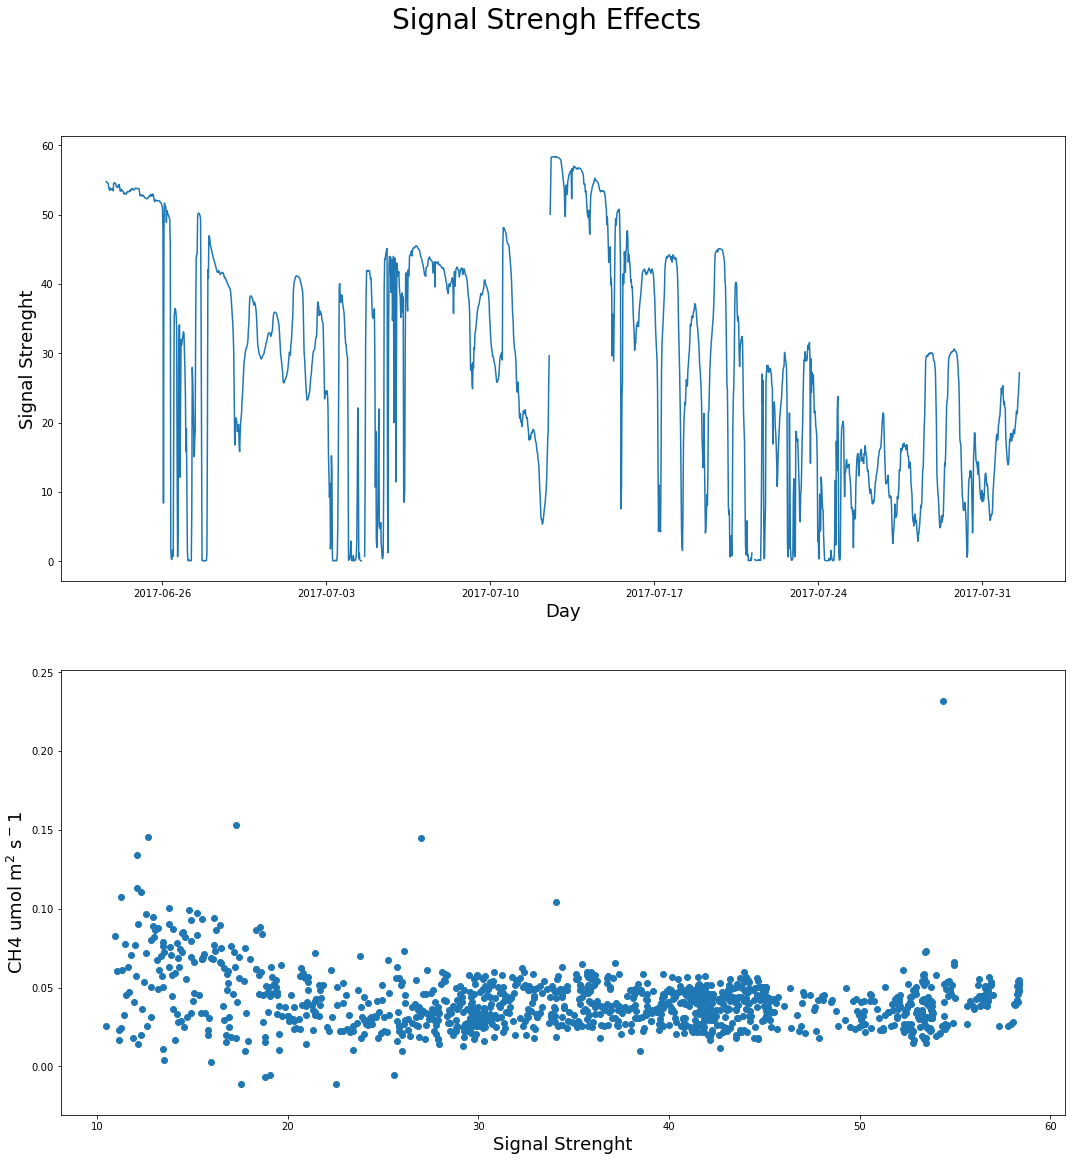

In [8]:
fig,axes = plt.subplots(nrows = 2,ncols = 1,figsize = (18,18))
# print(Data['rssi_77_mean'])
fig.suptitle('Signal Strengh Effects',fontsize = 28)
axes[0].plot(Data['rssi_77_mean'])
axes[0].set_xlabel('Day',fontsize = 18)
axes[0].set_ylabel('Signal Strenght',fontsize = 18)

axes[1].scatter(Data['rssi_77_mean'],Data['ch4_noSSFilter'])
axes[1].set_ylabel('CH4 umol m$^2$ s$^-1$',fontsize = 18)
axes[1].set_xlabel('Signal Strenght',fontsize = 18)
plt.show()

## CO$_2$ uptake looks to peak in mid july

* Even thoug R$_n$ is strongest in June, the vegetation hadn't fully matured, and there was a fine coating of silt on everthing from the flood which probably inhibited photsyntheisis until the first significant rain event.


* Solar noon is at 15:00 so its interseting to see CO$_2$ fluxes peaking before then, probably related to an increase in soil emission later in the afternoon when soil temperatures are warmer

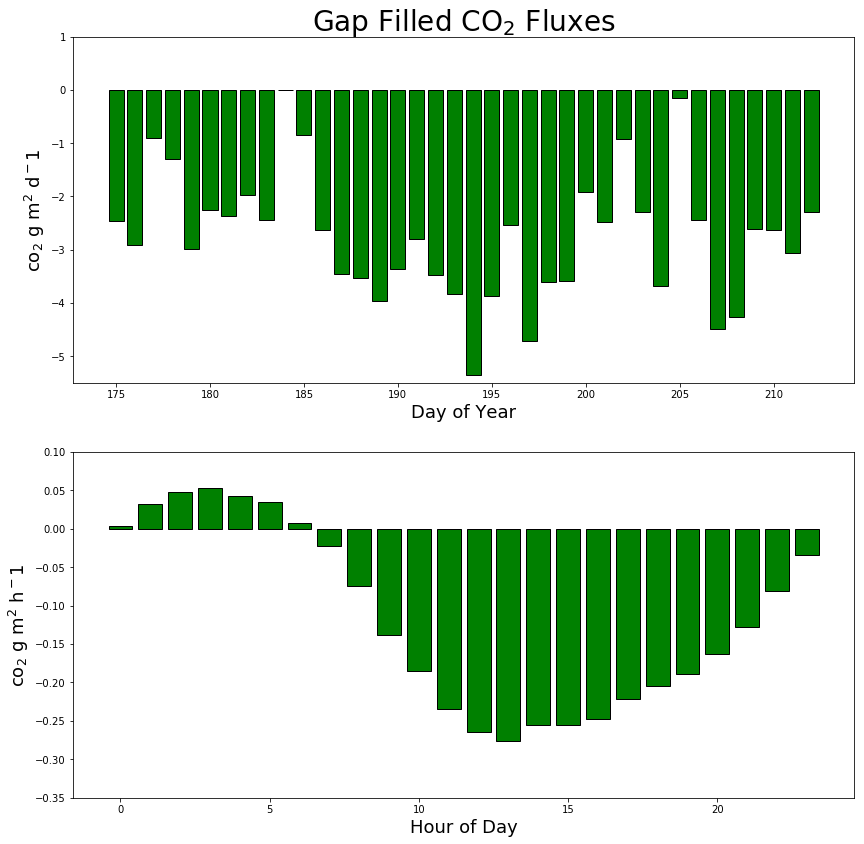

In [9]:
fig,axes = plt.subplots(nrows = 2,ncols = 1,figsize = (14,14))

axes[0].bar(Daily.index,Daily['co2_flux_filled_ANN']* 1e-6 * 44.0095 *3600*24 ,
            color = 'green',edgecolor = 'black')
axes[0].set_ylim(-5.5,1)
axes[0].set_ylabel('co$_2$ g m$^2$ d$^-1$',fontsize = 18)
axes[0].set_xlabel('Day of Year',fontsize = 18)
axes[0].set_title('Gap Filled CO$_2$ Fluxes',fontsize = 28)

axes[1].bar(Hourly.index,Hourly['co2_flux_filled_ANN']* 1e-6 * 44.0095 *3600 ,
            color = 'green',edgecolor = 'black')
axes[1].set_ylim(-.35,.1)
axes[1].set_ylabel('co$_2$ g m$^2$ h$^-1$',fontsize = 18)
axes[1].set_xlabel('Hour of Day',fontsize = 18)

plt.show()

## I've estimate Re and GPP based off a the response of Re to soil temperatures at 2.5 cm under low light conditions PPFD < 15 umol m$^2$ s$^-$$^1$

* GPP = (NEE - Re)*-1
    * The *-1 is just arbitraty so that GPP is positive

* RE estimates are disproportionately draw from the latter poitions of the period, I haven't hada a chance to "verifty" them w/ the the chamber measurements taken on June 23 and July 10 yet.

* Two factors that have a strong impacat on Re aside from the soil surface temperatures.

    1) Water Table Depth:  Not particularly correlated w/ soil surface temps over the period we've observed os it isn't accounted for by the modeld.
        * A greater volume of aerated soil available to demomposition = greater soil CO2 emissions.  AL depth is less important I think since this region is consistently below the water table
    2) Its not that clearly deffined, but higher values of u* seem to be associated with higher respiration.  Stronger turbulence can help vent the soil
    
* We'll know a bit more once we have more night time observations.  It might be worth estimating Re for different condtions if we can get enough observations.

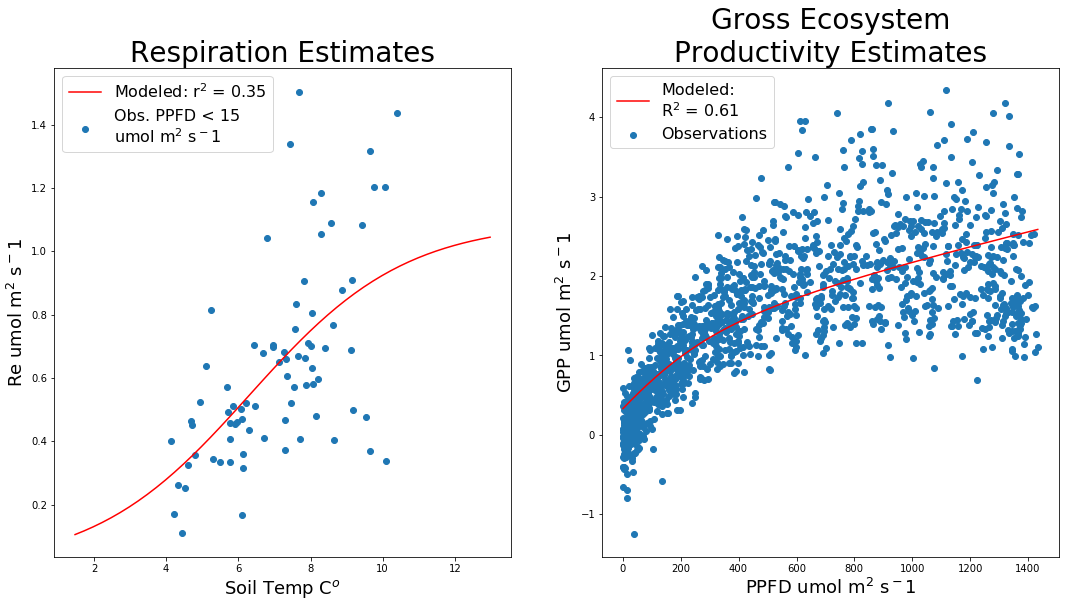

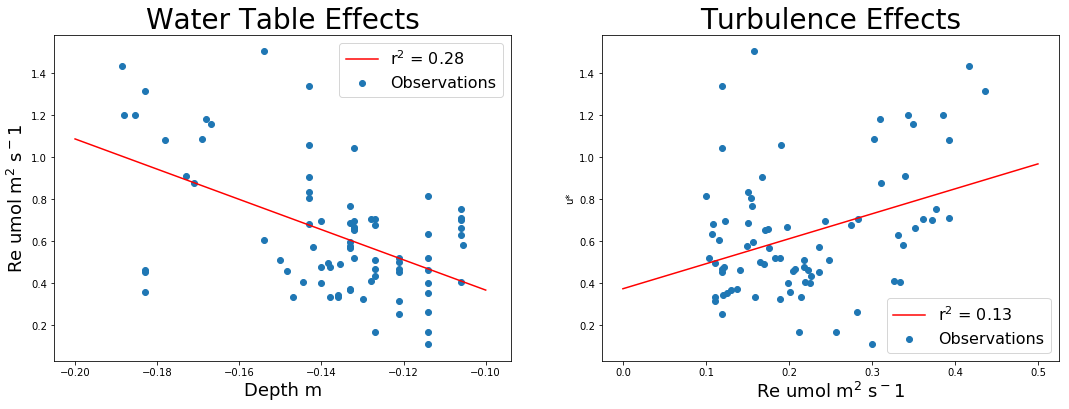

In [10]:
from scipy.optimize import curve_fit
from scipy import stats
from sklearn import metrics
def R_func(T,r1,r2,r3):
    return(1/(r1*r2**T+r3))
def P_func(PPFD,MQY,PM):
    cv =.7
    return(MQY*PPFD + PM - ((MQY*PPFD + PM)**2 - 4*cv*MQY*PPFD*PM)**.5/(2*cv))

## Fit the Curves
Dark_Thresh = 15
Dark = Data[Data['PPFD_Avg']<=Dark_Thresh]
Dark = Dark[['co2_flux','PPFD_Avg','Temp_2_5_1','u*','Tabel_1']].dropna()
popt_r, pcov = curve_fit(R_func, Dark['Temp_2_5_1'], Dark['co2_flux'],p0=(1,1,1))
Data['R'] = R_func(Data['Temp_2_5_1'],*popt_r)
Data['GPP'] = (Data['co2_flux']-Data['R'])*-1
P = Data[Data['PPFD_Avg']>=Dark_Thresh]
P = P[['GPP','PPFD_Avg']].dropna()
popt_p, pcov = curve_fit(P_func, P['PPFD_Avg'], P['GPP'],p0=(.003,12))

## Ordered Data for Plotting fits
Temp = np.arange(Data['Temp_2_5_1'].min(),Data['Temp_2_5_1'].max(),.25)
PAR = np.arange(Data['PPFD_Avg'].min(),Data['PPFD_Avg'].max(),1)

## Calculate r2
Rsq_Resp = metrics.explained_variance_score(Dark['co2_flux'].values,R_func(Dark['Temp_2_5_1'],*popt_r))
Rsq_GPP = metrics.explained_variance_score(P['GPP'].values,P_func(P['PPFD_Avg'],*popt_p))


fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (18,9))
axes[0].scatter(Dark['Temp_2_5_1'],Dark['co2_flux'],label = 'Obs. PPFD < 15\numol m$^2$ s$^-1$')
axes[0].plot(Temp,R_func(Temp,*popt_r),color = 'red',label = 'Modeled: r$^2$ = '+str(np.round(Rsq_Resp,2)))
axes[0].legend(loc = 2,fontsize = 16)
axes[0].set_ylabel('Re umol m$^2$ s$^-1$',fontsize = 18)
axes[0].set_xlabel('Soil Temp C$^o$',fontsize = 18)
axes[0].set_title('Respiration Estimates',fontsize = 28)

axes[1].scatter(Data['PPFD_Avg'],Data['GPP'],label = 'Observations')
axes[1].plot(PAR,P_func(PAR,*popt_p),color = 'red',label = 'Modeled:\nR$^2$ = '+ str(np.round(Rsq_GPP,2)))
axes[1].legend(loc = 2,fontsize = 16)
axes[1].set_ylabel('GPP umol m$^2$ s$^-1$',fontsize = 18)
axes[1].set_xlabel('PPFD umol m$^2$ s$^-1$',fontsize = 18)
axes[1].set_title('Gross Ecosystem\nProductivity Estimates',fontsize = 28)

DailyDiff = (Data['GPP']-P_func(Data['PPFD_Avg'],*popt_p)).groupby(Data.index.dayofyear).mean()
Daily['GPP_Diff'] = DailyDiff[1:-1]



fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize = (18,6))
Slope, intercept, r_value, p, std_err = stats.linregress(Dark['Tabel_1'],Dark['co2_flux'])
axes[0].scatter(Dark['Tabel_1'],Dark['co2_flux'],label = 'Observations')
T = np.arange(-.2,0,.1)
axes[0].plot(T,T*Slope+intercept,color = 'red',label = 'r$^2$ = '+str(np.round(r_value**2,2)))
axes[0].legend(fontsize = 16)
axes[0].set_xlabel('Depth m',fontsize = 18)
axes[0].set_ylabel('Re umol m$^2$ s$^-1$',fontsize = 18)
axes[0].set_title('Water Table Effects',fontsize = 28)

Slope, intercept, r_value, p, std_err = stats.linregress(Dark['u*'],Dark['co2_flux'])
axes[1].scatter(Dark['u*'],Dark['co2_flux'],label = 'Observations')
U = np.arange(0,.6,.1)
axes[1].plot(U,U*Slope+intercept,color = 'red',label = 'r$^2$ = '+str(np.round(r_value**2,2)))
axes[1].legend(fontsize = 16)
axes[1].set_xlabel('Re umol m$^2$ s$^-1$',fontsize = 18)
axes[1].set_ylabel('u*')
axes[1].set_title('Turbulence Effects',fontsize = 28)

plt.show()

## CH$_4$ fluxes have increased slightly through the season.

* Likely mostly due to the changes in active layer and water table depth

* Looks like a very modest diunral signal

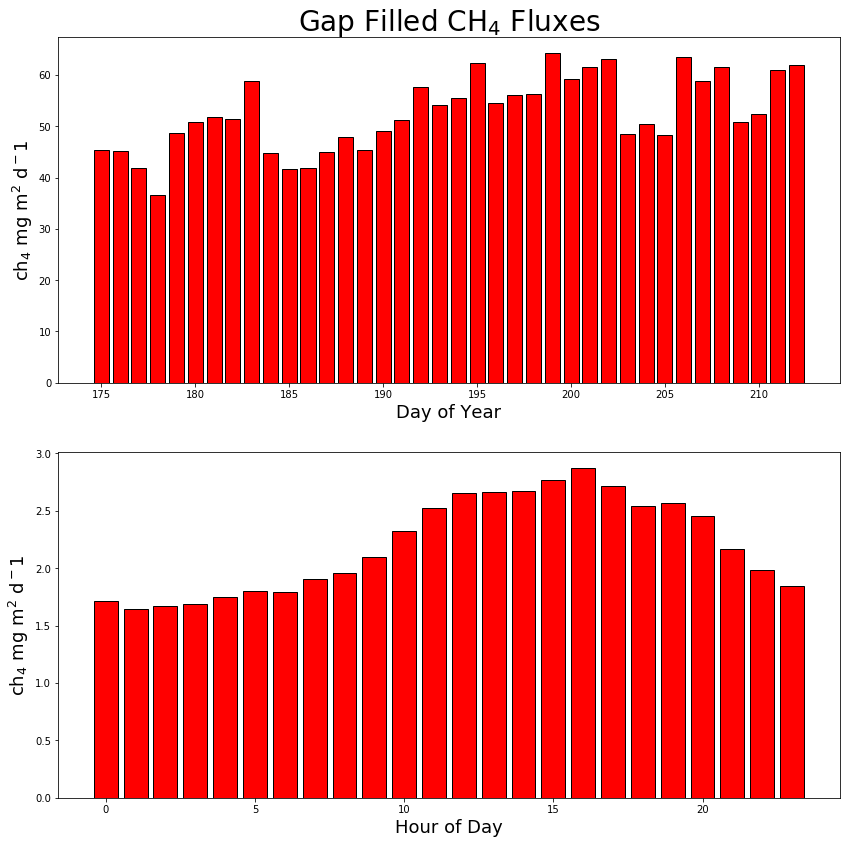

In [11]:
fig,axes = plt.subplots(nrows = 2,ncols = 1,figsize = (14,14))

axes[0].bar(Daily.index,Daily['ch4_flux_filled_ANN']* 1e-3 * 16.04246 *3600*24,
            color = 'red',edgecolor = 'black')
axes[0].set_ylabel('ch$_4$ mg m$^2$ d$^-1$',fontsize = 18)
axes[0].set_xlabel('Day of Year',fontsize = 18)
axes[0].set_title('Gap Filled CH$_4$ Fluxes',fontsize = 28)

axes[1].bar(Hourly.index,Hourly['ch4_flux_filled_ANN']* 1e-3 * 16.04246 *3600,
            color = 'red',edgecolor = 'black')
# axes[1].set_ylim(-.35,.1)
axes[1].set_ylabel('ch$_4$ mg m$^2$ d$^-1$',fontsize = 18)
axes[1].set_xlabel('Hour of Day',fontsize = 18)

plt.show()

## CH$_4$ fluxes are highly varriable

* Some of these relationships are likely more significant over longer averaging periods, eg. daily for active layer depths.  However, I need to look into other methods to quantify them, because I don't think treating all days equally (eg. some have full 48 samples and some days have no records and others only have a handfull) is a sound method nor do I think its a good idea to build them off of the daily gap filled data set.

* The inverse relationship with 15 cm soil temperatures is pretty intersting considering higher termperatures are also asociated with a deeper active layer.

* I've elcected to plot fluxes agains the thickness of the saturated layer: Avtive Layer - Water Table depth
    * Active Layer depth and water table depth are highly correlated (as the active layer drops, the water table drops, but the volume of saturated soil doesn't necessarrily drop) so you end up with an inverse relationship with water table depth that is mostly just the active layer signal

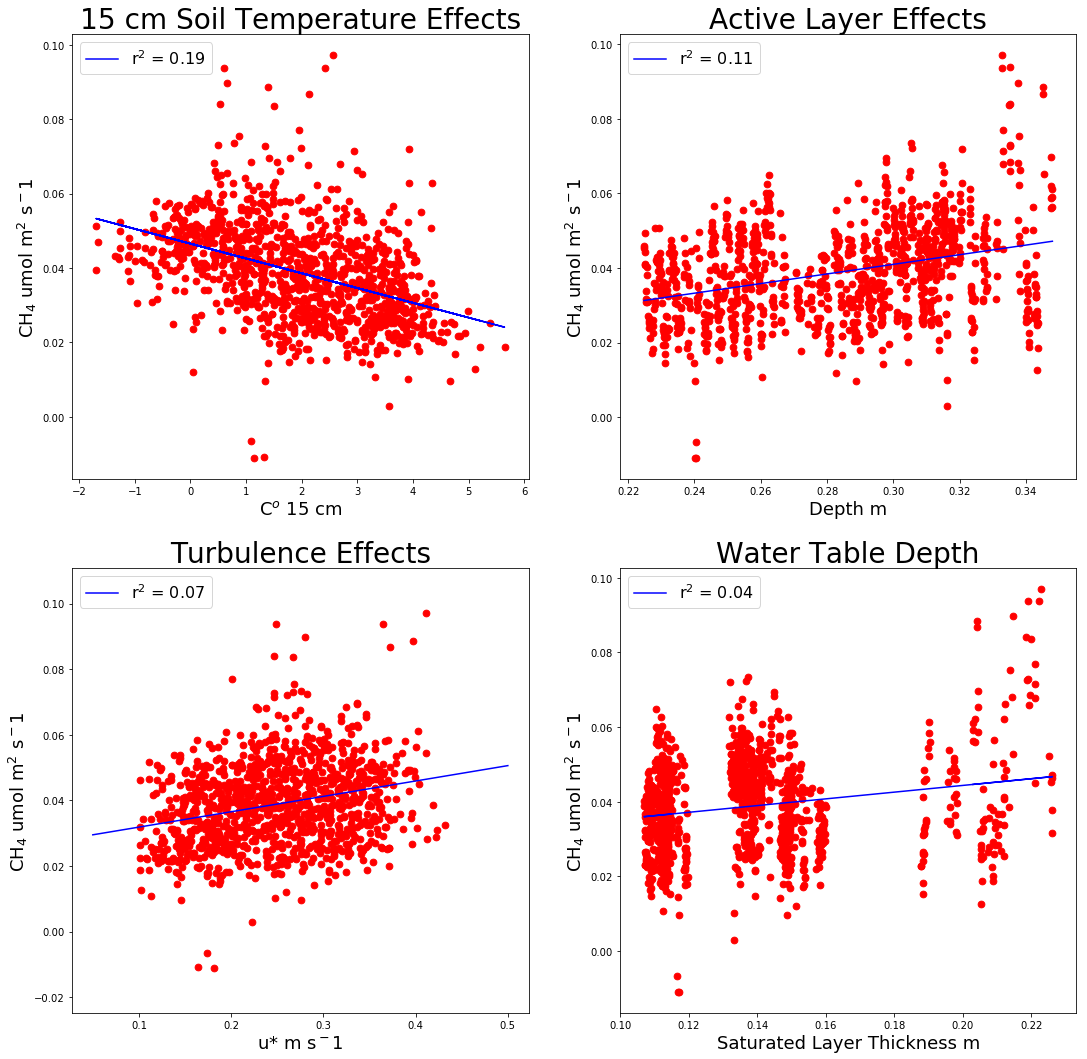

In [12]:
fig,axes = plt.subplots(nrows = 2,ncols = 2,figsize = (18,18))
CH4fit = Data[['ch4_flux','u*','Active_Layer_1','Temp_15_1','Tabel_1']].dropna()

Slope, intercept, r_value, p, std_err = stats.linregress(CH4fit['Temp_15_1'],CH4fit['ch4_flux'])
axes[0,0].plot(CH4fit['Temp_15_1'],CH4fit['Temp_15_1']*Slope+intercept,color ='blue',
           label = 'r$^2$ = '+str(np.round(r_value**2,2)))
axes[0,0].scatter(CH4fit['Temp_15_1'],CH4fit['ch4_flux'],color = 'red',s = 45,label = '')
# axes[0,1]set_ylim(.02,.08)
axes[0,0].set_ylabel('CH$_4$ umol m$^2$ s$^-1$',fontsize = 18)
axes[0,0].set_xlabel('C$^o$ 15 cm',fontsize = 18)
axes[0,0].legend(loc = 2,fontsize = 16)
axes[0,0].set_title('15 cm Soil Temperature Effects',fontsize = 28)

Slope, intercept, r_value, p, std_err = stats.linregress(CH4fit['Active_Layer_1'],CH4fit['ch4_flux'])
axes[0,1].plot(CH4fit['Active_Layer_1'],CH4fit['Active_Layer_1']*Slope+intercept,color ='blue',
               label = 'r$^2$ = '+str(np.round(r_value**2,2)))
axes[0,1].scatter(CH4fit['Active_Layer_1'],CH4fit['ch4_flux'],color = 'red',s = 45,label = '')
axes[0,1].set_ylabel('CH$_4$ umol m$^2$ s$^-1$',fontsize = 18)
axes[0,1].set_xlabel('Depth m',fontsize = 18)
axes[0,1].legend(loc = 2,fontsize = 16)
axes[0,1].set_title('Active Layer Effects',fontsize = 28)


U = np.arange(.05,.51,.05)
Slope, intercept, r_value, p, std_err = stats.linregress(CH4fit['u*'],CH4fit['ch4_flux'])
axes[1,0].scatter(Data['u*'],Data['ch4_flux'],color = 'red',s = 45,label = '')
axes[1,0].plot(U,U*Slope+intercept,color ='blue',label = 'r$^2$ = '+str(np.round(r_value**2,2)))
axes[1,0].legend(loc = 2,fontsize = 16)
axes[1,0].set_ylabel('CH$_4$ umol m$^2$ s$^-1$',fontsize = 18)
axes[1,0].set_xlabel('u* m s$^-1$',fontsize = 18)
axes[1,0].set_title('Turbulence Effects',fontsize = 28)

CH4fit['SatDepth'] = CH4fit['Active_Layer_1'] + CH4fit['Tabel_1']
Slope, intercept, r_value, p, std_err = stats.linregress(CH4fit['SatDepth'],CH4fit['ch4_flux'])
axes[1,1].plot(CH4fit['SatDepth'],(CH4fit['SatDepth'])*Slope+intercept,color ='blue',
           label = 'r$^2$ = '+str(np.round(r_value**2,2)))
axes[1,1].scatter(CH4fit['SatDepth'],CH4fit['ch4_flux'],color = 'red',s = 45,label = '')
# axes[1,0].set_ylim(.02,.08)
axes[1,1].legend(loc = 2,fontsize = 16)
axes[1,1].set_xlabel('Saturated Layer Thickness m',fontsize = 18)
axes[1,1].set_ylabel('CH$_4$ umol m$^2$ s$^-1$',fontsize = 18)
axes[1,1].set_title('Water Table Depth',fontsize = 28)
plt.show()



## Here is how the gap filling methods worked

* The ANN's work very well for H, LE, and CO$_2$ the fit for CH$_4$ isn't as tight, but I'd say they still work pretty well


* The models are fed with the input variable of interst and a set of predictors.  I used net radiaont (PPFD for CO2 and CH4), soil temps at 2.5 and 15 cm, water table depth, air temps, relative humidity, and friction velocity.


* The models haven't been optimized yet, so this is just a rough approximation. There is likely a bit of over/under fitting that will be resolved after I preform the optimisation (This takes a lot of time and there is no sense doing it until I have all the data)

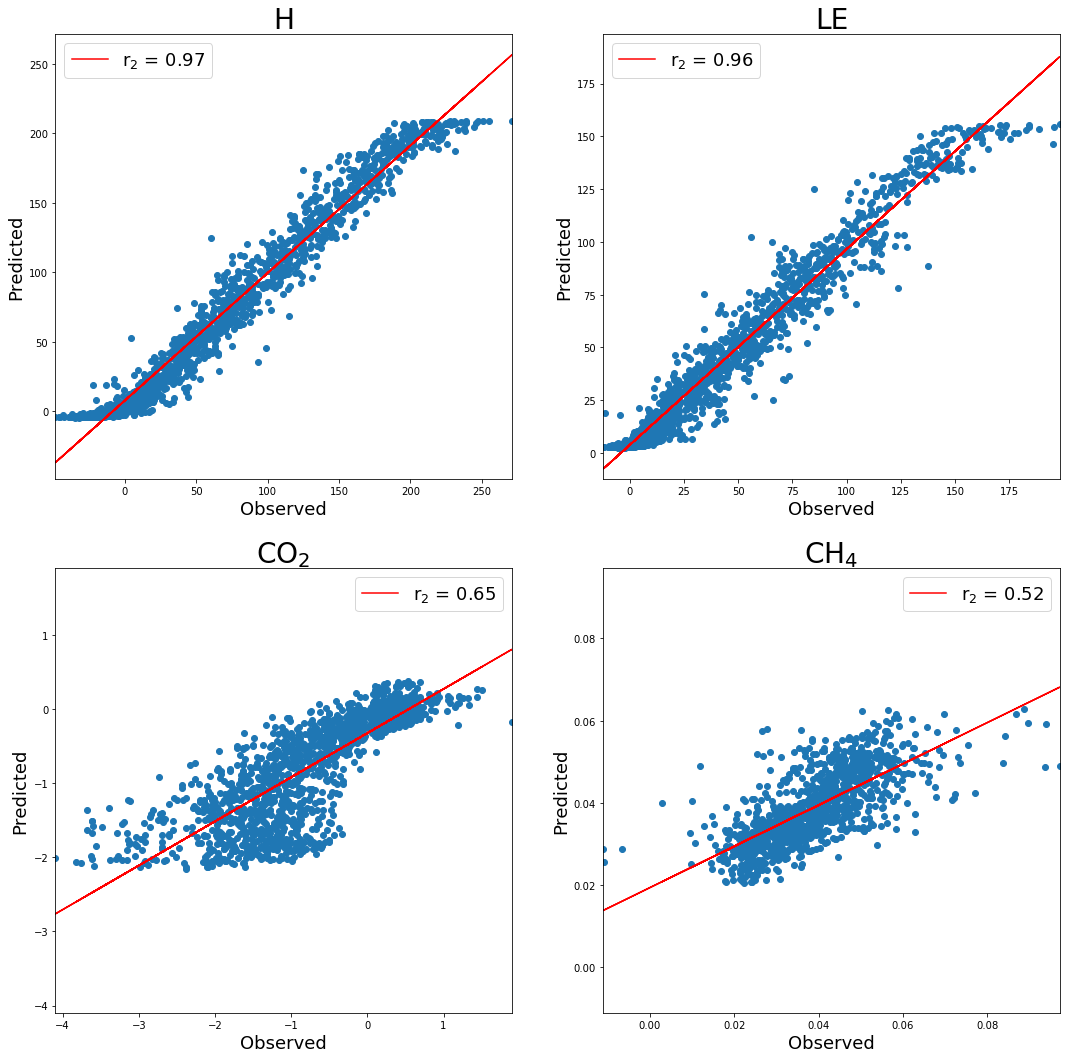

In [13]:
fig, axes = plt.subplots(nrows = 2,ncols = 2,figsize = (18,18))

HFit = Data[['H','H_sgd']].dropna()
Slope, intercept, r_value, p, std_err = stats.linregress(HFit['H'],HFit['H_sgd'])
axes[0,0].scatter(HFit['H'],HFit['H_sgd'],label = '')
axes[0,0].plot(HFit['H'],HFit['H']*Slope+intercept,color = 'red',label = 'r$_2$ = '+str(np.round(r_value**2,2)))
axes[0,0].legend(fontsize = 18)
axes[0,0].set_title('H',fontsize = 28)
axes[0,0].set_ylabel('Predicted', fontsize = 18)
axes[0,0].set_xlabel('Observed',fontsize = 18)
axes[0,0].set_xlim(HFit['H'].min(),HFit['H'].max())
axes[0,0].set_ylim(HFit['H'].min(),HFit['H'].max())

LEFit = Data[['LE','LE_sgd']].dropna()
Slope, intercept, r_value, p, std_err = stats.linregress(LEFit['LE'],LEFit['LE_sgd'])
axes[0,1].scatter(LEFit['LE'],LEFit['LE_sgd'],label = '')
axes[0,1].plot(LEFit['LE'],LEFit['LE']*Slope+intercept,color = 'red',label = 'r$_2$ = '+str(np.round(r_value**2,2)))
axes[0,1].legend(fontsize = 18)
axes[0,1].set_title('LE',fontsize = 28)
axes[0,1].set_ylabel('Predicted', fontsize = 18)
axes[0,1].set_xlabel('Observed',fontsize = 18)
axes[0,1].set_xlim(LEFit['LE'].min(),LEFit['LE'].max())
axes[0,1].set_ylim(LEFit['LE'].min(),LEFit['LE'].max())

COFit = Data[['co2_flux','co2_flux_sgd']].dropna()
Slope, intercept, r_value, p, std_err = stats.linregress(COFit['co2_flux'],COFit['co2_flux_sgd'])
axes[1,0].scatter(COFit['co2_flux'],COFit['co2_flux_sgd'],label = '')
axes[1,0].plot(COFit['co2_flux'],COFit['co2_flux']*Slope+intercept,color = 'red',label = 'r$_2$ = '+str(np.round(r_value**2,2)))
axes[1,0].legend(fontsize = 18)
axes[1,0].set_title('CO$_2$',fontsize = 28)
axes[1,0].set_ylabel('Predicted', fontsize = 18)
axes[1,0].set_xlabel('Observed',fontsize = 18)
axes[1,0].set_xlim(COFit['co2_flux'].min(),COFit['co2_flux'].max())
axes[1,0].set_ylim(COFit['co2_flux'].min(),COFit['co2_flux'].max())

CHFit = Data[['ch4_flux','ch4_flux_sgd']].dropna()
Slope, intercept, r_value, p, std_err = stats.linregress(CHFit['ch4_flux'],CHFit['ch4_flux_sgd'])
axes[1,1].scatter(CHFit['ch4_flux'],CHFit['ch4_flux_sgd'],label = '')
axes[1,1].plot(CHFit['ch4_flux'],CHFit['ch4_flux']*Slope+intercept,color = 'red',label = 'r$_2$ = '+str(np.round(r_value**2,2)))
axes[1,1].legend(fontsize = 18)
axes[1,1].set_title('CH$_4$',fontsize = 28)
axes[1,1].set_ylabel('Predicted', fontsize = 18)
axes[1,1].set_xlabel('Observed',fontsize = 18)
axes[1,1].set_xlim(CHFit['ch4_flux'].min(),CHFit['ch4_flux'].max())
axes[1,1].set_ylim(CHFit['ch4_flux'].min(),CHFit['ch4_flux'].max())

plt.show()

## Finally, the net CO$_2$ equivalent cabron balance so far.  Uptake was quite weak through the end of June then quite strong throught most of July.

* I think we've reached a point where uptake is becoming weaker and we'll start to see net emissions.  It will be very interesting to see how things play out through August and into September.

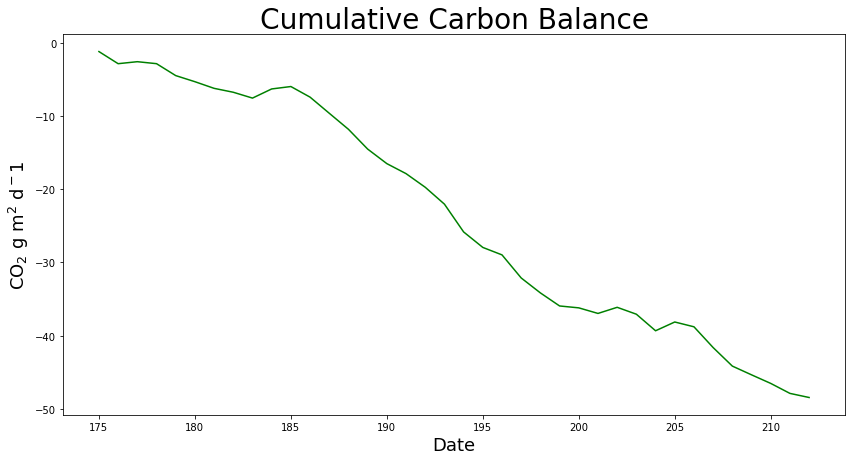

In [14]:
plt.figure(figsize = (14,7))
plt.plot((Daily['co2_flux_filled_ANN'].cumsum()* 1e-6 * 44.0095 *3600*24+Daily['ch4_flux_filled_ANN'].cumsum()*28* 1e-6* 16.04246 *3600*24),
        color = 'green')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('CO$_2$ g m$^2$ d$^-1$',fontsize = 18)
plt.title('Cumulative Carbon Balance',fontsize = 28)
plt.show()

In [15]:
%%html
<style>
div.input {
    display:none;
}